In [1]:
import torch 
torch.manual_seed(1)
import sys
sys.path.append('..')

from targets import Target
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'

In [2]:
from models import MixedModelDensityEstimator
from models import DIFDensityEstimatorLayer
from models import RealNVPDensityEstimatorLayer

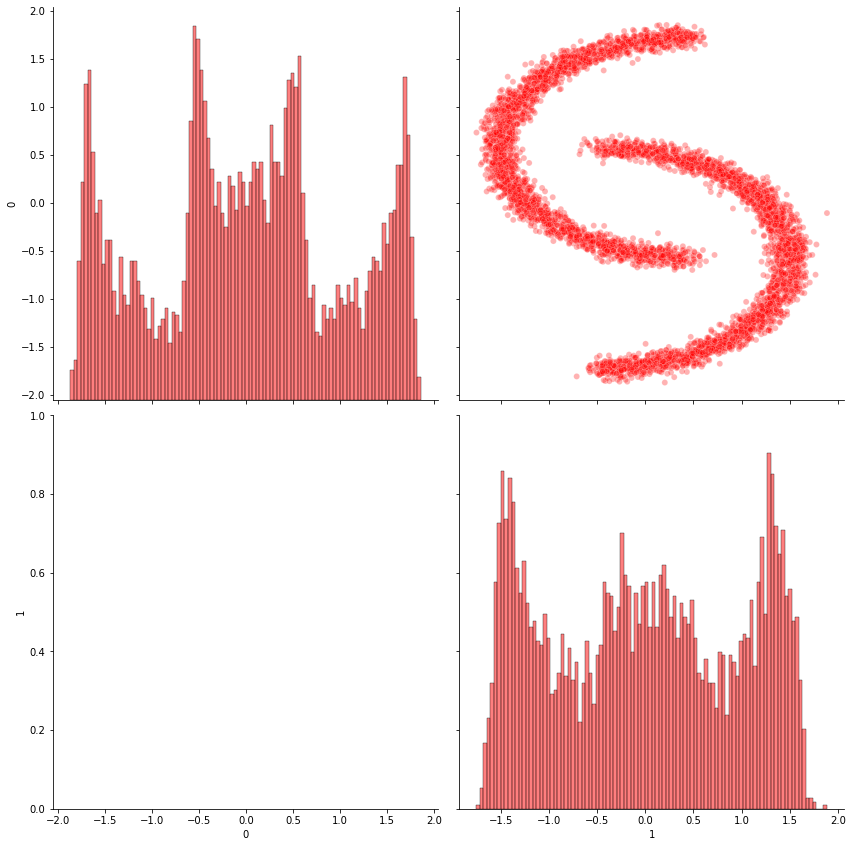

In [4]:
example =  "Moons"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [07:39<00:00,  6.53it/s, loss = 1.1628921031951904]


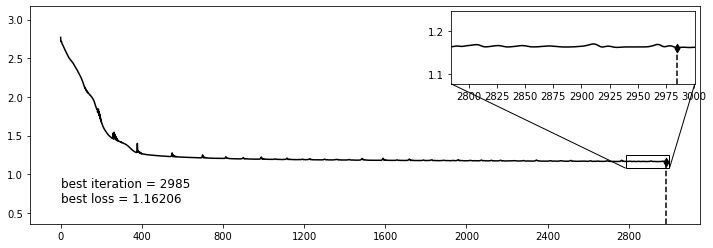

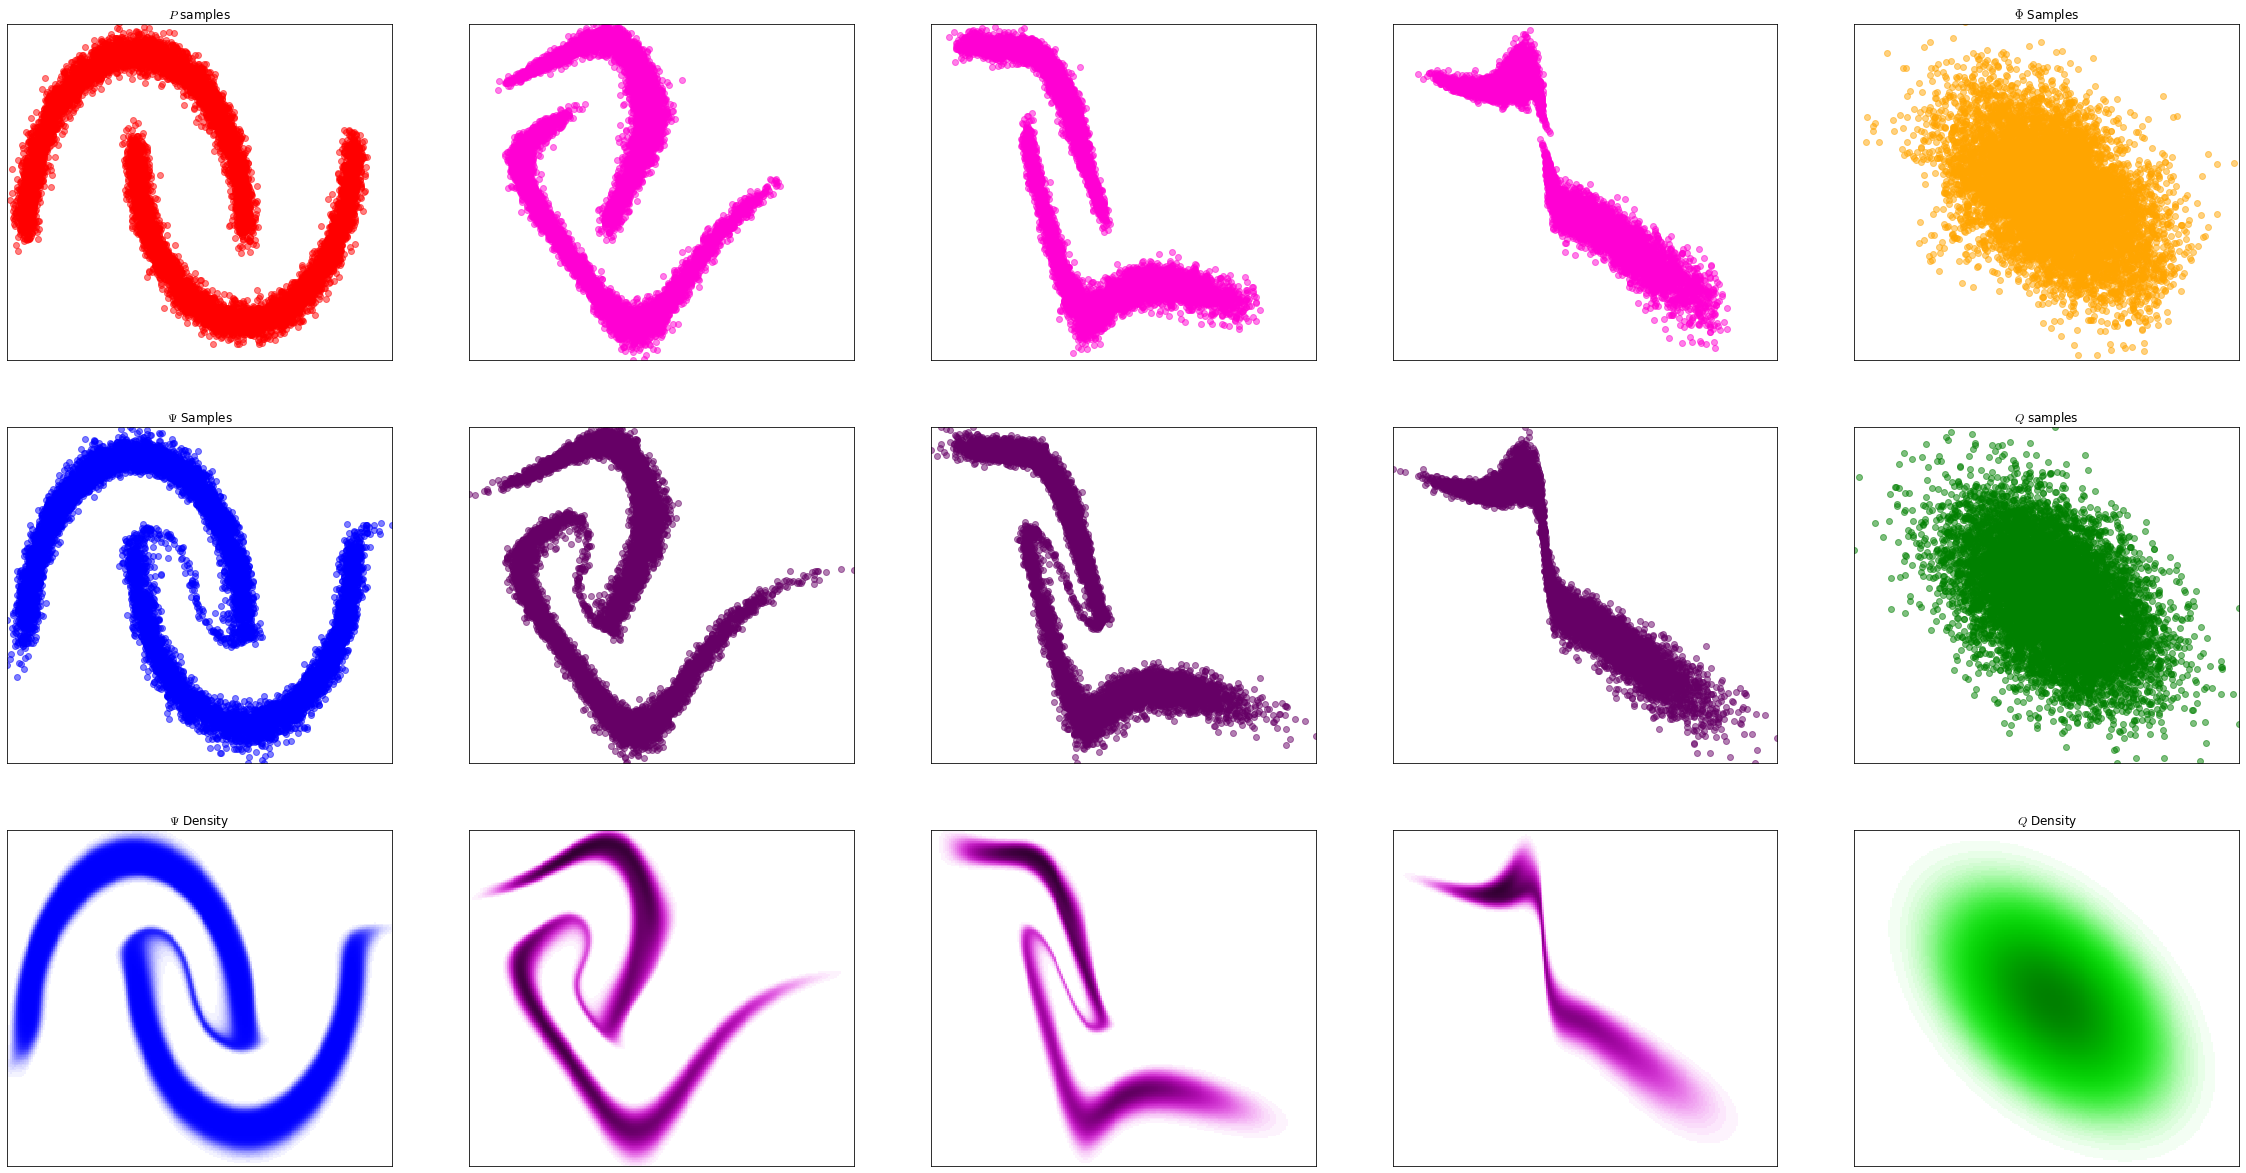

In [7]:
num_samples = target_samples.shape[0]
epochs =3000
batch_size = int(num_samples/1)
structure = [[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]]]
realnvp = MixedModelDensityEstimator(target_samples,structure)
realnvp.train(epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [04:30<00:00,  1.11it/s, loss = 1.1494966745376587]


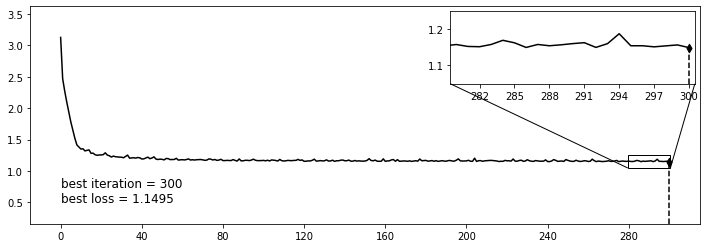

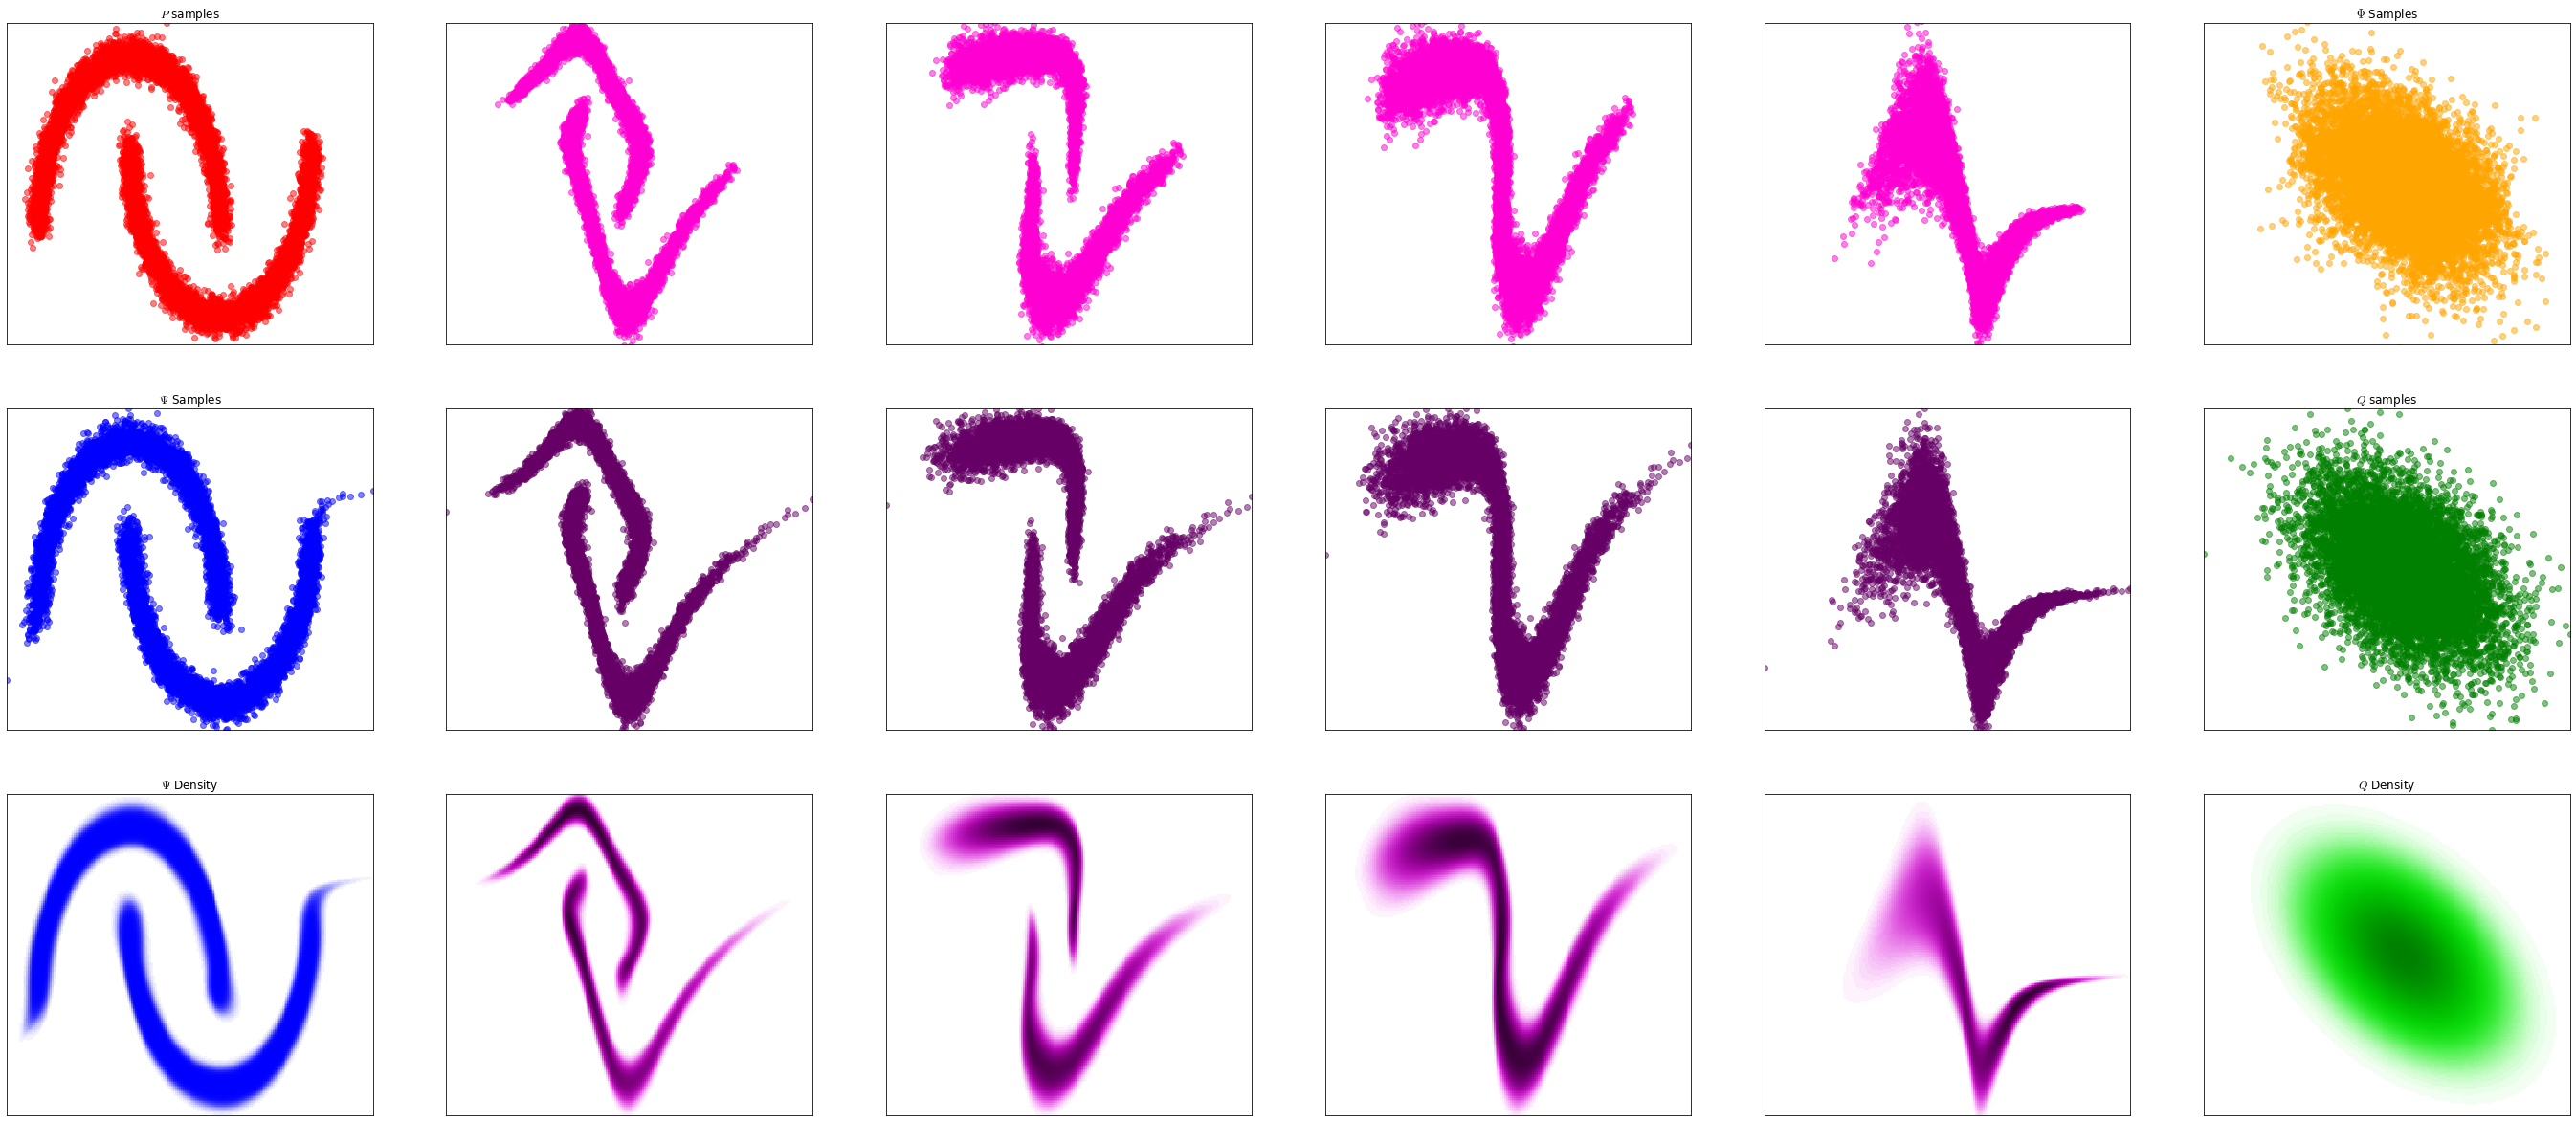

In [8]:
num_samples = target_samples.shape[0]
epochs =300
batch_size = int(num_samples/50)
structure = [[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]],[DIFDensityEstimatorLayer,2],[RealNVPDensityEstimatorLayer,[256,256,256]],[RealNVPDensityEstimatorLayer,[256,256,256]]]
realnvpDIF = MixedModelDensityEstimator(target_samples,structure)
realnvpDIF.train(epochs, batch_size, visual = True)
realnvpDIF.model_visual(num_samples=int(num_samples/5), flow = True)

In [4]:
from models import MixedModelSampler
from models import DIFSamplerLayer
from models import RealNVPSamplerLayer

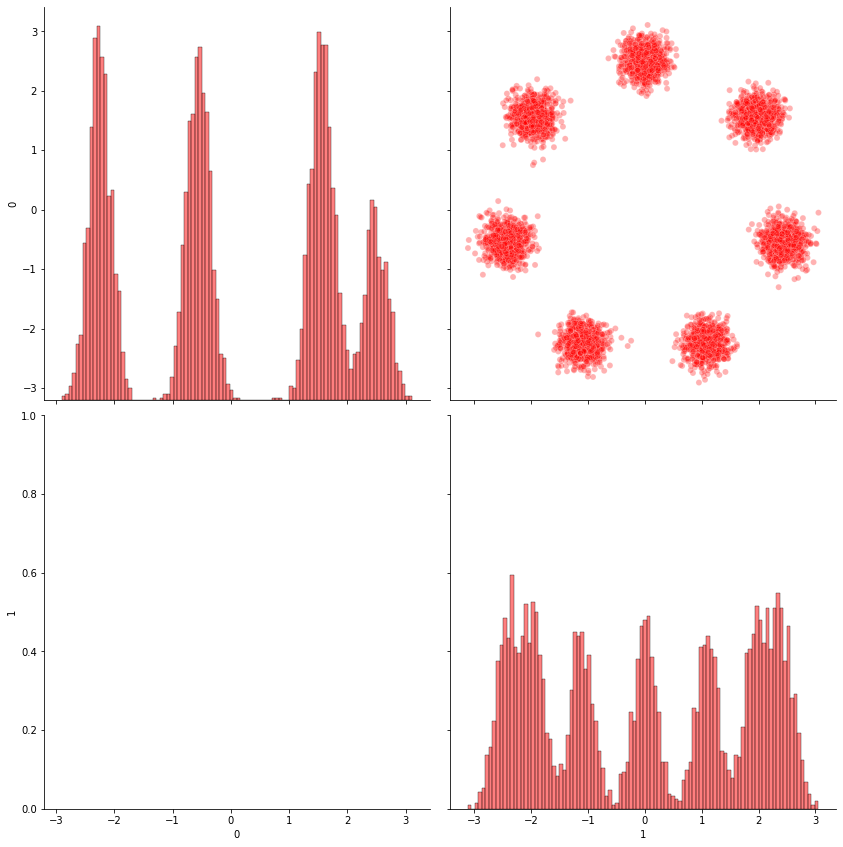

In [9]:
example =  "Orbits"
num_samples = 50000
target =Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:26<00:00,  1.11it/s, loss = 4.781324863433838]
C:\Users\Elouan\PycharmProjects\Discretely-Indexed-Flows\venv\lib\site-packages\torch\functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


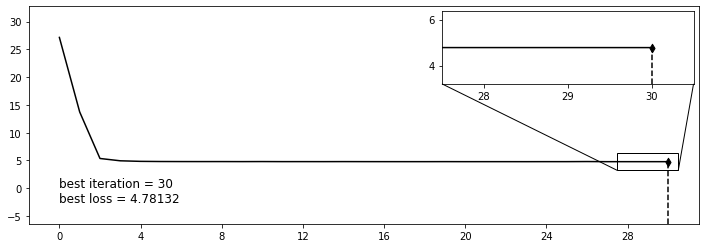

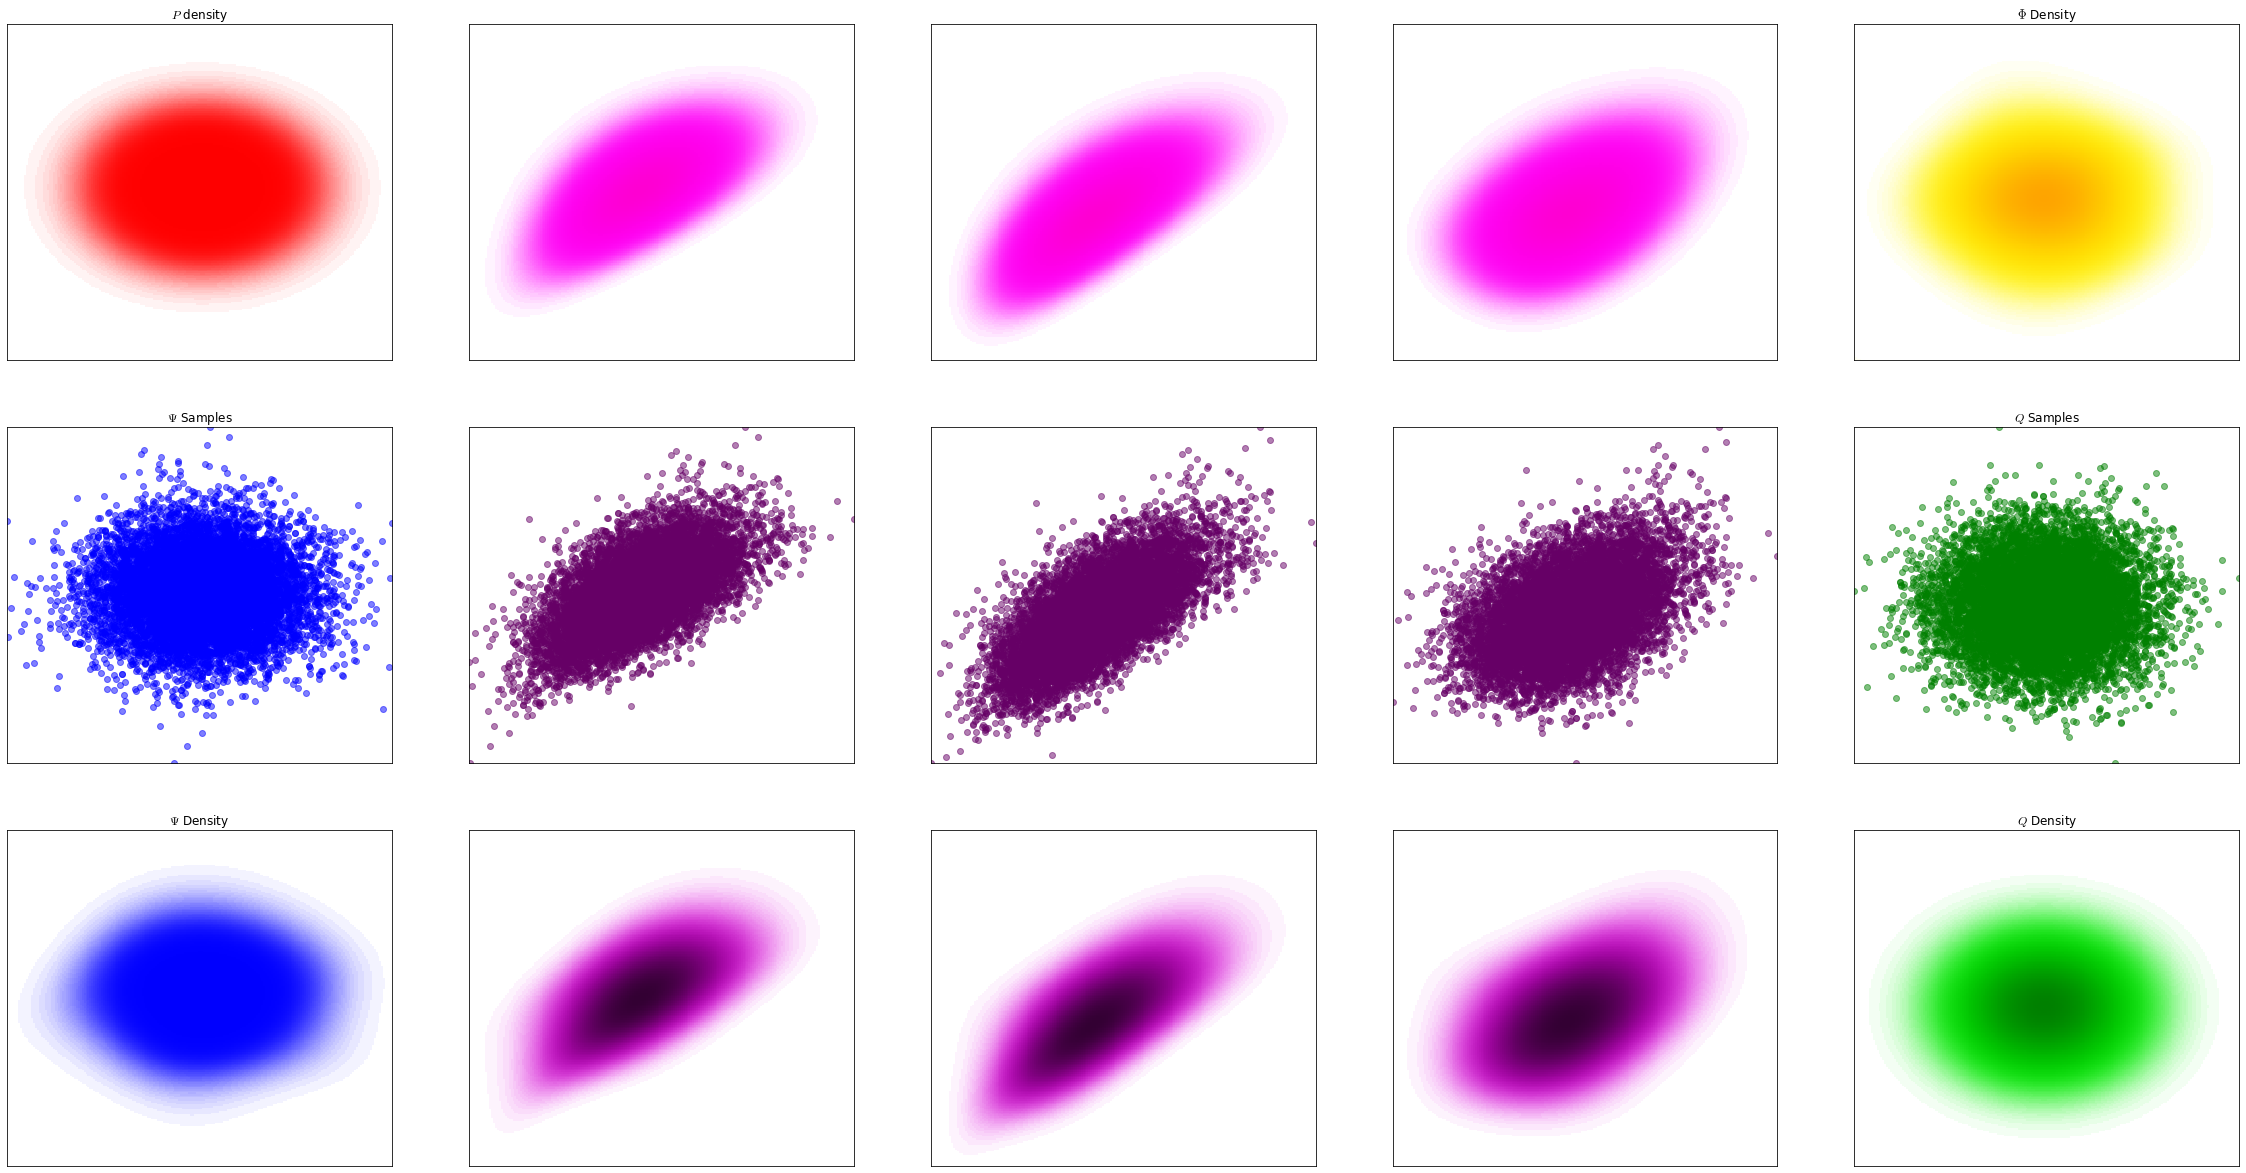

In [21]:
num_samples = target_samples.shape[0]
epochs =30
batch_size = int(num_samples/50)
structure = [[RealNVPSamplerLayer,[256,256,256]],[RealNVPSamplerLayer,[256,256,256]],[RealNVPSamplerLayer,[256,256,256]],[RealNVPSamplerLayer,[256,256,256]]]
realnvp = MixedModelSampler(target_log_density,p,structure)
realnvp.train(num_samples,epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=int(num_samples/5), flow = True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:50<00:00,  1.69s/it, loss = 3.463155508041382]


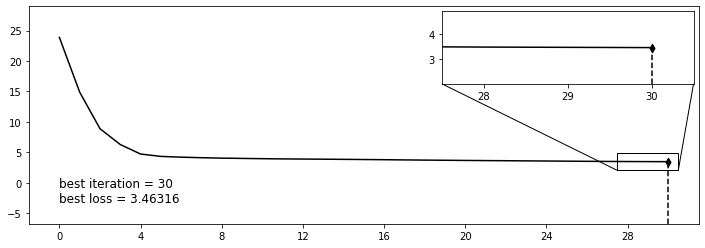

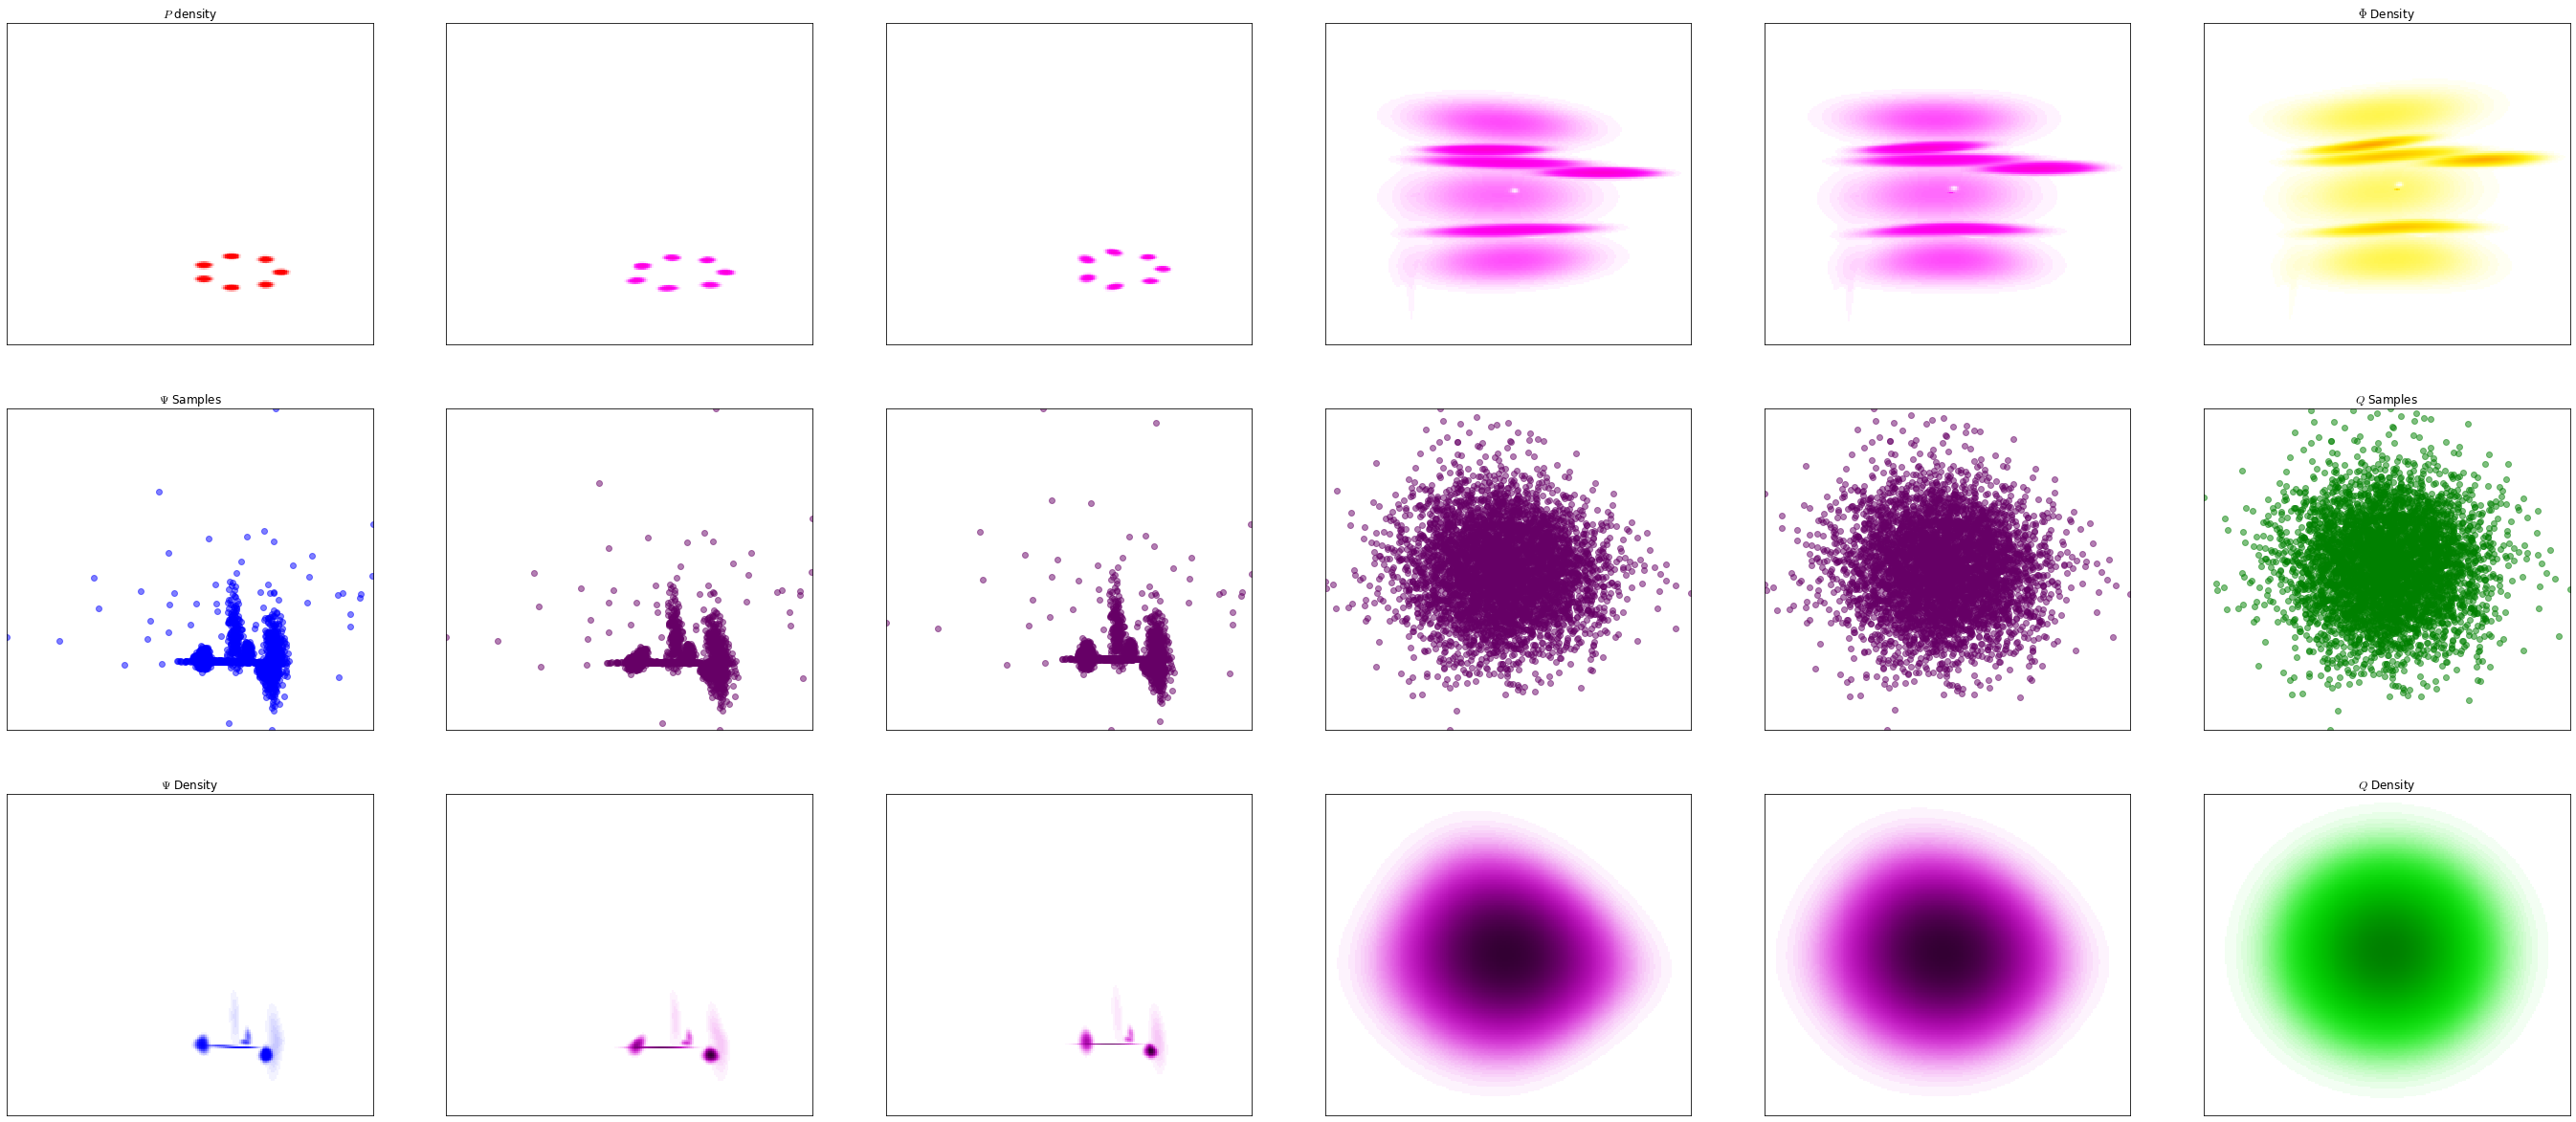

In [14]:
num_samples  = 10000
epochs =30
batch_size = int(num_samples/50)
structure = [[RealNVPSamplerLayer,[12,12,12]],[RealNVPSamplerLayer,[12,12,12]],[DIFSamplerLayer,8],[RealNVPSamplerLayer,[12,12,12]],[RealNVPSamplerLayer,[12,12,12]]]
realnvp = MixedModelSampler(target_log_density,p,structure)
realnvp.train(num_samples ,epochs, batch_size, visual = True)
realnvp.model_visual(num_samples=5000, flow = True)